<h1>ToC<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

参考：  
https://qiita.com/shinido/items/2904fa1e9a6c78650b93  
https://ja.wikipedia.org/wiki/%E8%89%B2%E5%B7%AE  
https://www.konicaminolta.jp/instruments/knowledge/color/section2/06.html

In [1]:
import sys
sys.path.append('/home/rio_kurihara/MyRepositories/Image/')
from utils import color

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd

def plot_two_color(color1_hex, color2_hex, title='two_color_sample'):
    df = pd.DataFrame([1, 1])

    df.plot(kind='bar', figsize=(4, 1.5),
                 color=[[color1_hex, color2_hex]], width=0.85, legend=False)

    # グラフの枠をすべて描画しない
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.title(title)
    plt.tick_params(labelbottom="off", bottom="off") # x軸の削除
    plt.tick_params(labelleft="off", left="off") # y軸の削除

In [3]:
list_colors = [
    [(255, 0  , 0), (0  ,255 , 0)],
    [(255, 0  , 0), (0  , 0  , 255)],
    [(255, 0  , 0), (255, 255, 0)],
    [(255, 0  , 0), (255, 0  , 255)],
    [(255, 0  , 0), (255, 128, 0)],
    [(255, 0  , 0), (255, 0  , 128)],
    [(255, 255, 0), (255, 0  , 255)],
    [(255, 255, 0), (0  , 255, 255)]    
]

/home/rio_kurihara/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


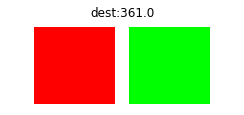

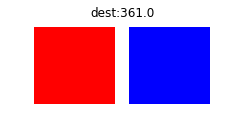

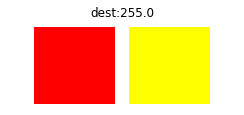

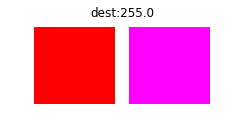

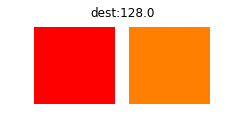

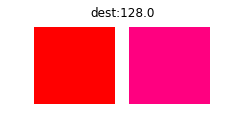

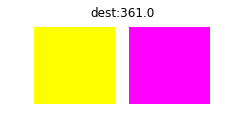

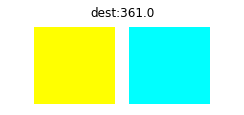

In [4]:
for _color in list_colors:
    color1_rgb = _color[0]
    color2_rgb = _color[1]
    color1_hex = color.rgb2hex(color1_rgb)
    color2_hex = color.rgb2hex(color2_rgb)

    dest = round(color.calc_dist_rgb_euclid(color1_rgb, color2_rgb))
    
    plot_two_color(color1_hex, color2_hex, 'dest:'+str(dest))

確認用：https://syncer.jp/color-converter

In [68]:
list_colors = [
    ['#FF0000', '#400000'],
    ['#FF0000', '#FFBF00']
]

list_colors = [
    ['#f06e50', '#f0a01e'],
    ['#96fa1e', '#64fa50']
]

1.0倍


/home/rio_kurihara/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


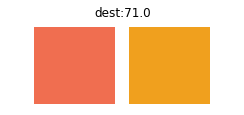

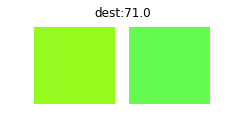

In [69]:
# RGB
list_dest = []
for _color in list_colors:
    color1_hex = _color[0]
    color2_hex = _color[1]
    color1_rgb = color.hex2rgb(color1_hex)
    color2_rgb = color.hex2rgb(color2_hex)

    dest = round(color.calc_dist_rgb_euclid(color1_rgb, color2_rgb))    
    list_dest.append(dest)
    plot_two_color(color1_hex, color2_hex, 'dest:'+str(dest))
diff = round(list_dest[1] / list_dest[0], 2)
print('{}倍'.format(diff))

参考：http://d.hatena.ne.jp/pashango_p/20110519/1305758419

In [70]:
RGB2XYZ_D65 = (
    0.412453, 0.357580, 0.180423,
    0.212671, 0.715160, 0.072169,
    0.019334, 0.119193, 0.950227
)

D65 = ( 0.950456, 1., 1.088754 );

_coff = (
     RGB2XYZ_D65[0] * (1.0 / D65[0]), RGB2XYZ_D65[1] * (1.0 / D65[0]), RGB2XYZ_D65[2] * (1.0 / D65[0]),
     RGB2XYZ_D65[3] * (1.0 / D65[1]), RGB2XYZ_D65[4] * (1.0 / D65[1]), RGB2XYZ_D65[5] * (1.0 / D65[1]),
     RGB2XYZ_D65[6] * (1.0 / D65[2]), RGB2XYZ_D65[7] * (1.0 / D65[2]), RGB2XYZ_D65[8] * (1.0 / D65[2]),
)

def _conv_func(v):
    if v > 0.008856:
        return v ** (1.0 / 3.0)
    else:
        return (903.3 * v + 16 ) / 116.0

def rgb2xyz(rgb):
    rgb = [x/255.0 for x in rgb]
    xyz = (
        rgb[0]*_coff[0] + rgb[1]*_coff[1] + rgb[2]*_coff[2],
        rgb[0]*_coff[3] + rgb[1]*_coff[4] + rgb[2]*_coff[5],
        rgb[0]*_coff[6] + rgb[1]*_coff[7] + rgb[2]*_coff[8],
    )
    return xyz

def rgb2lab(rgb):
    xyz = rgb2xyz(rgb)

    fX, fY, fZ = map(_conv_func, xyz) 
    L = 116.*fY - 16.;
    a = 500.*(fX - fY);
    b = 200.*(fY - fZ);
    
    return (L, a, b)

0.9倍


/home/rio_kurihara/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


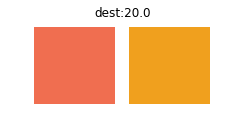

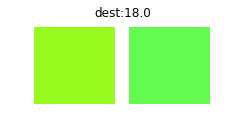

In [71]:
# XYZ
list_dest = []
for _color in list_colors:
    color1_hex = _color[0]
    color2_hex = _color[1]
    color1_rgb = color.hex2rgb(color1_hex)
    color2_rgb = color.hex2rgb(color2_hex)

    # rgb -> xyz
    color1_xyz = rgb2xyz(color1_rgb)
    color2_xyz = rgb2xyz(color2_rgb)
    color1_xyz = (
        int(round(color1_xyz[0] * 100)),
        int(round(color1_xyz[1] * 100)),
        int(round(color1_xyz[2] * 100))        
    )
    color2_xyz = (
        int(round(color2_xyz[0] * 100)),
        int(round(color2_xyz[1] * 100)),
        int(round(color2_xyz[2] * 100))        
    )

    dest = round(color.calc_dist_rgb_euclid(color1_xyz, color2_xyz))    
    list_dest.append(dest)
    plot_two_color(color1_hex, color2_hex, 'dest:'+str(dest))
diff = round(list_dest[1] / list_dest[0], 2)
print('{}倍'.format(diff))

0.65倍


/home/rio_kurihara/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


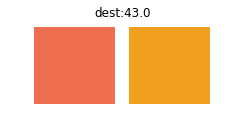

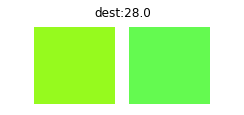

In [72]:
# Lab
list_dest = []
for _color in list_colors:
    color1_hex = _color[0]
    color2_hex = _color[1]
    color1_rgb = color.hex2rgb(color1_hex)
    color2_rgb = color.hex2rgb(color2_hex)

    # rgb -> Lab
    color1_lab = rgb2lab(color1_rgb)
    color2_lab = rgb2lab(color2_rgb)
    color1_lab = (
        int(round(color1_lab[0])),
        int(round(color1_lab[1])),
        int(round(color1_lab[2]))        
    )
    color2_lab = (
        int(round(color2_lab[0])),
        int(round(color2_lab[1])),
        int(round(color2_lab[2]))        
    )

    dest = round(color.calc_dist_rgb_euclid(color1_lab, color2_lab))    
    list_dest.append(dest)
    plot_two_color(color1_hex, color2_hex, 'dest:'+str(dest))
diff = round(list_dest[1] / list_dest[0], 2)
print('{}倍'.format(diff))

参考：https://python-colormath.readthedocs.io/en/latest/delta_e.html

In [96]:
list_colors = [
    [(35 , 34 , 39) , (33 , 33 , 35) , 'NG'],
    [(147, 130, 120), (149, 132, 119), 'NG'],
    [(125, 174, 178), (130, 175, 175), 'NG'],
    [(88 , 70 , 56 ), (88 , 71 , 58) , 'NG'],
    [(248, 221, 238), (246, 217, 228), 'OK'],
    [(81 , 150, 207), (85 , 147, 200), 'OK'],
    [(232, 228, 227), (230, 229, 226), 'OK'],
    [(237, 2  , 185), (226, 56 , 158), 'OK']
]


/home/rio_kurihara/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


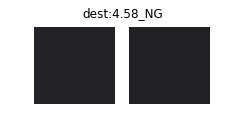

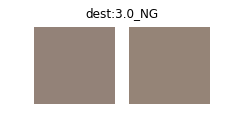

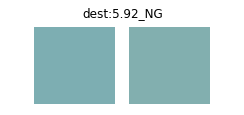

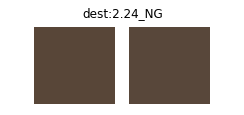

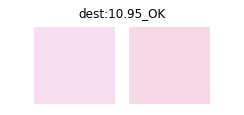

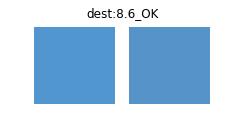

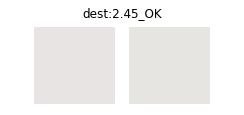

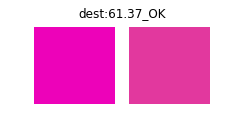

In [97]:
# RGB
list_dest = []

for _color in list_colors:
    color1_rgb = _color[0]
    color2_rgb = _color[1]
    color1_hex = color.rgb2hex(color1_rgb)
    color2_hex = color.rgb2hex(color2_rgb)
    dest = round(color.calc_dist_rgb_euclid(color1_rgb, color2_rgb), 2)
    plot_two_color(color1_hex, color2_hex, 'dest:'+str(dest)+'_'+_color[2])

/home/rio_kurihara/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


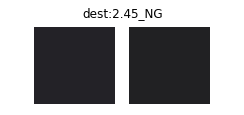

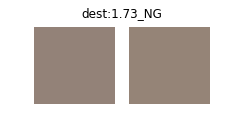

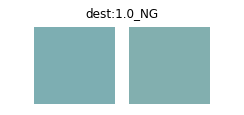

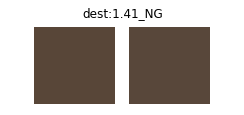

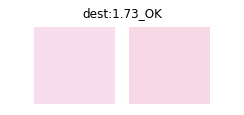

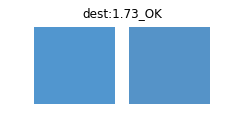

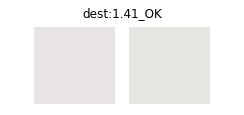

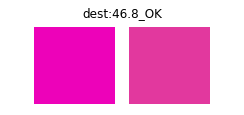

In [98]:
# Lab
list_dest = []
for _color in list_colors:
    color1_rgb = _color[0]
    color2_rgb = _color[1]
    color1_hex = color.rgb2hex(color1_rgb)
    color2_hex = color.rgb2hex(color2_rgb)

    # rgb -> Lab
    color1_lab = rgb2lab(color1_rgb)
    color2_lab = rgb2lab(color2_rgb)
    color1_lab = (
        int(round(color1_lab[0])),
        int(round(color1_lab[1])),
        int(round(color1_lab[2]))        
    )
    color2_lab = (
        int(round(color2_lab[0])),
        int(round(color2_lab[1])),
        int(round(color2_lab[2]))        
    )

    dest = round(color.calc_dist_rgb_euclid(color1_lab, color2_lab), 2)    
    list_dest.append(dest)
    plot_two_color(color1_hex, color2_hex, 'dest:'+str(dest)+'_'+_color[2])

/home/rio_kurihara/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


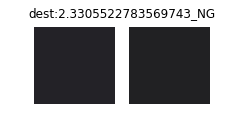

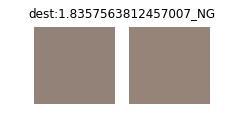

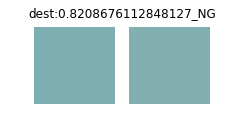

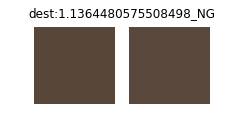

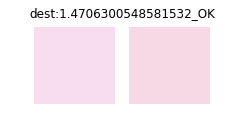

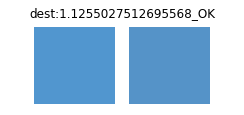

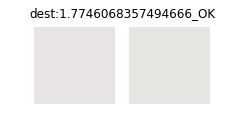

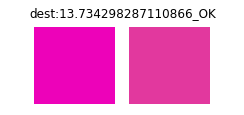

In [99]:
# CIEDE2000
from colormath.color_objects import LabColor
from colormath.color_diff import delta_e_cie1976, delta_e_cie2000

# Lab
list_dest = []

for _color in list_colors:
    color1_rgb = _color[0]
    color2_rgb = _color[1]
    color1_hex = color.rgb2hex(color1_rgb)
    color2_hex = color.rgb2hex(color2_rgb)

    # rgb -> Lab
    color1_lab = rgb2lab(color1_rgb)
    color2_lab = rgb2lab(color2_rgb)
    color1_lab = (
        int(round(color1_lab[0])),
        int(round(color1_lab[1])),
        int(round(color1_lab[2]))        
    )
    color2_lab = (
        int(round(color2_lab[0])),
        int(round(color2_lab[1])),
        int(round(color2_lab[2]))        
    )

    # Reference color.
    color1 = LabColor(lab_l=color1_lab[0], lab_a=color1_lab[1], lab_b=color1_lab[2])
    # Color to be compared to the reference.
    color2 = LabColor(lab_l=color2_lab[0], lab_a=color2_lab[1], lab_b=color2_lab[2])
    # This is your delta E value as a float.
    delta_e = delta_e_cie2000(color1, color2)
    list_dest.append(delta_e)
    plot_two_color(color1_hex, color2_hex, 'dest:'+str(delta_e)+'_'+_color[2])
# diff = round(list_dest[1] / list_dest[0], 2)
# print('{}倍'.format(diff))